# Opdracht 5.2 - Classificatie

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Continue with the training and test datasets

In [22]:
df_train = pd.read_csv('../datasets/iris_training_dataset.csv', index_col=0)
df_test = pd.read_csv('../datasets/iris_test_dataset.csv', index_col=0)

In [23]:
df_train

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_scaled,sepal_width_scaled,petal_length_scaled,petal_width_scaled,PCA3_0,PCA3_1,PCA3_2,species
9,4.9,3.1,1.5,0.1,0.166667,0.458333,0.068966,0.000000,-0.667641,-0.072914,-0.054618,setosa
114,5.8,2.8,5.1,2.4,0.416667,0.333333,0.689655,0.958333,0.463711,-0.115438,0.250668,virginica
145,6.7,3.0,5.2,2.3,0.666667,0.416667,0.706897,0.916667,0.535916,0.068024,0.073739,virginica
135,7.7,3.0,6.1,2.3,0.944444,0.416667,0.862069,0.916667,0.745162,0.179668,-0.137221,virginica
140,6.7,3.1,5.6,2.4,0.666667,0.458333,0.775862,0.958333,0.599619,0.100623,0.108044,virginica
...,...,...,...,...,...,...,...,...,...,...,...,...
143,6.8,3.2,5.9,2.3,0.694444,0.500000,0.827586,0.916667,0.609555,0.146463,0.073762,virginica
116,6.5,3.0,5.5,1.8,0.611111,0.416667,0.758621,0.708333,0.409842,0.039453,-0.014927,virginica
53,5.5,2.3,4.0,1.3,0.333333,0.125000,0.500000,0.500000,0.045108,-0.326529,-0.022142,versicolor
38,4.4,3.0,1.3,0.2,0.027778,0.416667,0.034483,0.041667,-0.711902,-0.168921,0.058204,setosa


In [24]:
df_test

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_scaled,sepal_width_scaled,petal_length_scaled,petal_width_scaled,PCA3_0,PCA3_1,PCA3_2,species
91,6.1,3.0,4.6,1.4,0.500000,0.416667,0.603448,0.541667,0.159586,0.000866,-0.023490,versicolor
63,6.1,2.9,4.7,1.4,0.500000,0.375000,0.620690,0.541667,0.176700,-0.037621,-0.039195,versicolor
103,6.3,2.9,5.6,1.8,0.555556,0.375000,0.775862,0.708333,0.404426,-0.023519,0.009274,virginica
6,4.6,3.4,1.4,0.3,0.083333,0.583333,0.051724,0.083333,-0.677009,0.003624,0.099716,setosa
59,5.2,2.7,3.9,1.4,0.250000,0.291667,0.482759,0.541667,0.002211,-0.212800,0.121674,versicolor
29,4.7,3.2,1.6,0.2,0.111111,0.500000,0.086207,0.041667,-0.658668,-0.061207,0.023403,setosa
27,5.2,3.5,1.5,0.2,0.250000,0.625000,0.068966,0.041667,-0.632218,0.113070,-0.031788,setosa
35,5.0,3.2,1.2,0.2,0.194444,0.500000,0.017241,0.041667,-0.667808,-0.019691,-0.031374,setosa
99,5.7,2.8,4.1,1.3,0.388889,0.333333,0.517241,0.500000,0.046472,-0.116794,0.008852,versicolor
122,7.7,2.8,6.7,2.0,0.944444,0.333333,0.965517,0.791667,0.740874,0.097607,-0.248567,virginica


### Target column

In [25]:
target_name = 'species'

### Feature columns

In [26]:
# feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
feature_names = ['sepal_length_scaled', 'sepal_width_scaled', 'petal_length_scaled', 'petal_width_scaled']
# feature_names = [name for name in names[:-1] if 'scaled' in name]
# feature_names = [name for name in names[:-1] if 'PCA3' in name]

In [27]:
print('features:', feature_names)
print('target:', target_name)

features: ['sepal_length_scaled', 'sepal_width_scaled', 'petal_length_scaled', 'petal_width_scaled']
target: species


In [28]:
df_train_features = df_train[feature_names]
df_train_target = df_train[target_name]
df_test_features = df_test[feature_names]
df_test_target = df_test[target_name]

In [29]:
target_categories = list(df_train[target_name].unique())
print('target categories:', target_categories)

target categories: ['setosa', 'virginica', 'versicolor']


In [30]:
df_train[target_name] = df_train[target_name].astype('category')
df_test[target_name] = df_test[target_name].astype('category')

### k-Nearest Neighbor Classification

In [31]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 3)

classifier.fit(df_train_features, df_train_target)

KNeighborsClassifier(n_neighbors=3)

In [32]:
df_test['3NN_predicted'] = classifier.predict(df_test_features)

df_test['3NN_correct'] = df_test['3NN_predicted'] == df_test[target_name]

df_test

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_scaled,sepal_width_scaled,petal_length_scaled,petal_width_scaled,PCA3_0,PCA3_1,PCA3_2,species,3NN_predicted,3NN_correct
91,6.1,3.0,4.6,1.4,0.500000,0.416667,0.603448,0.541667,0.159586,0.000866,-0.023490,versicolor,versicolor,True
63,6.1,2.9,4.7,1.4,0.500000,0.375000,0.620690,0.541667,0.176700,-0.037621,-0.039195,versicolor,versicolor,True
103,6.3,2.9,5.6,1.8,0.555556,0.375000,0.775862,0.708333,0.404426,-0.023519,0.009274,virginica,virginica,True
6,4.6,3.4,1.4,0.3,0.083333,0.583333,0.051724,0.083333,-0.677009,0.003624,0.099716,setosa,setosa,True
59,5.2,2.7,3.9,1.4,0.250000,0.291667,0.482759,0.541667,0.002211,-0.212800,0.121674,versicolor,versicolor,True
29,4.7,3.2,1.6,0.2,0.111111,0.500000,0.086207,0.041667,-0.658668,-0.061207,0.023403,setosa,setosa,True
27,5.2,3.5,1.5,0.2,0.250000,0.625000,0.068966,0.041667,-0.632218,0.113070,-0.031788,setosa,setosa,True
35,5.0,3.2,1.2,0.2,0.194444,0.500000,0.017241,0.041667,-0.667808,-0.019691,-0.031374,setosa,setosa,True
99,5.7,2.8,4.1,1.3,0.388889,0.333333,0.517241,0.500000,0.046472,-0.116794,0.008852,versicolor,versicolor,True
122,7.7,2.8,6.7,2.0,0.944444,0.333333,0.965517,0.791667,0.740874,0.097607,-0.248567,virginica,virginica,True


In [33]:
df_test['3NN_correct'].value_counts()

True     44
False     1
Name: 3NN_correct, dtype: int64

In [34]:
accuracy = np.sum(df_test['3NN_correct']) / len(df_test['3NN_correct'])
accuracy

0.9777777777777777

### Naive Bayes Classification

In [39]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

classifier.fit(df_train_features, df_train_target)

GaussianNB()

In [40]:
df_test['NB_predicted'] = classifier.predict(df_test_features)
df_test['NB_correct'] = df_test['NB_predicted'] == df_test[target_name]
df_test

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_scaled,sepal_width_scaled,petal_length_scaled,petal_width_scaled,PCA3_0,PCA3_1,PCA3_2,species,3NN_predicted,3NN_correct,NB_predicted,NB_correct
91,6.1,3.0,4.6,1.4,0.500000,0.416667,0.603448,0.541667,0.159586,0.000866,-0.023490,versicolor,versicolor,True,versicolor,True
63,6.1,2.9,4.7,1.4,0.500000,0.375000,0.620690,0.541667,0.176700,-0.037621,-0.039195,versicolor,versicolor,True,versicolor,True
103,6.3,2.9,5.6,1.8,0.555556,0.375000,0.775862,0.708333,0.404426,-0.023519,0.009274,virginica,virginica,True,virginica,True
6,4.6,3.4,1.4,0.3,0.083333,0.583333,0.051724,0.083333,-0.677009,0.003624,0.099716,setosa,setosa,True,setosa,True
59,5.2,2.7,3.9,1.4,0.250000,0.291667,0.482759,0.541667,0.002211,-0.212800,0.121674,versicolor,versicolor,True,versicolor,True
29,4.7,3.2,1.6,0.2,0.111111,0.500000,0.086207,0.041667,-0.658668,-0.061207,0.023403,setosa,setosa,True,setosa,True
27,5.2,3.5,1.5,0.2,0.250000,0.625000,0.068966,0.041667,-0.632218,0.113070,-0.031788,setosa,setosa,True,setosa,True
35,5.0,3.2,1.2,0.2,0.194444,0.500000,0.017241,0.041667,-0.667808,-0.019691,-0.031374,setosa,setosa,True,setosa,True
99,5.7,2.8,4.1,1.3,0.388889,0.333333,0.517241,0.500000,0.046472,-0.116794,0.008852,versicolor,versicolor,True,versicolor,True
122,7.7,2.8,6.7,2.0,0.944444,0.333333,0.965517,0.791667,0.740874,0.097607,-0.248567,virginica,virginica,True,virginica,True


In [41]:
df_test['NB_correct'].value_counts()

True     43
False     2
Name: NB_correct, dtype: int64

In [38]:
accuracy = np.sum(df_test['NB_correct']) / len(df_test['NB_correct'])
accuracy

0.9555555555555556

### Decision Tree Classification

In [42]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

classifier.fit(df_train_features, df_train_target)

DecisionTreeClassifier()

In [43]:
df_test['DT_predicted'] = classifier.predict(df_test_features)
df_test['DT_correct'] = df_test['DT_predicted'] == df_test[target_name]

df_test

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_scaled,sepal_width_scaled,petal_length_scaled,petal_width_scaled,PCA3_0,PCA3_1,PCA3_2,species,3NN_predicted,3NN_correct,NB_predicted,NB_correct,DT_predicted,DT_correct
91,6.1,3.0,4.6,1.4,0.500000,0.416667,0.603448,0.541667,0.159586,0.000866,-0.023490,versicolor,versicolor,True,versicolor,True,versicolor,True
63,6.1,2.9,4.7,1.4,0.500000,0.375000,0.620690,0.541667,0.176700,-0.037621,-0.039195,versicolor,versicolor,True,versicolor,True,versicolor,True
103,6.3,2.9,5.6,1.8,0.555556,0.375000,0.775862,0.708333,0.404426,-0.023519,0.009274,virginica,virginica,True,virginica,True,virginica,True
6,4.6,3.4,1.4,0.3,0.083333,0.583333,0.051724,0.083333,-0.677009,0.003624,0.099716,setosa,setosa,True,setosa,True,setosa,True
59,5.2,2.7,3.9,1.4,0.250000,0.291667,0.482759,0.541667,0.002211,-0.212800,0.121674,versicolor,versicolor,True,versicolor,True,versicolor,True
29,4.7,3.2,1.6,0.2,0.111111,0.500000,0.086207,0.041667,-0.658668,-0.061207,0.023403,setosa,setosa,True,setosa,True,setosa,True
27,5.2,3.5,1.5,0.2,0.250000,0.625000,0.068966,0.041667,-0.632218,0.113070,-0.031788,setosa,setosa,True,setosa,True,setosa,True
35,5.0,3.2,1.2,0.2,0.194444,0.500000,0.017241,0.041667,-0.667808,-0.019691,-0.031374,setosa,setosa,True,setosa,True,setosa,True
99,5.7,2.8,4.1,1.3,0.388889,0.333333,0.517241,0.500000,0.046472,-0.116794,0.008852,versicolor,versicolor,True,versicolor,True,versicolor,True
122,7.7,2.8,6.7,2.0,0.944444,0.333333,0.965517,0.791667,0.740874,0.097607,-0.248567,virginica,virginica,True,virginica,True,virginica,True


In [45]:
df_test['DT_correct'].value_counts()

True     43
False     2
Name: DT_correct, dtype: int64

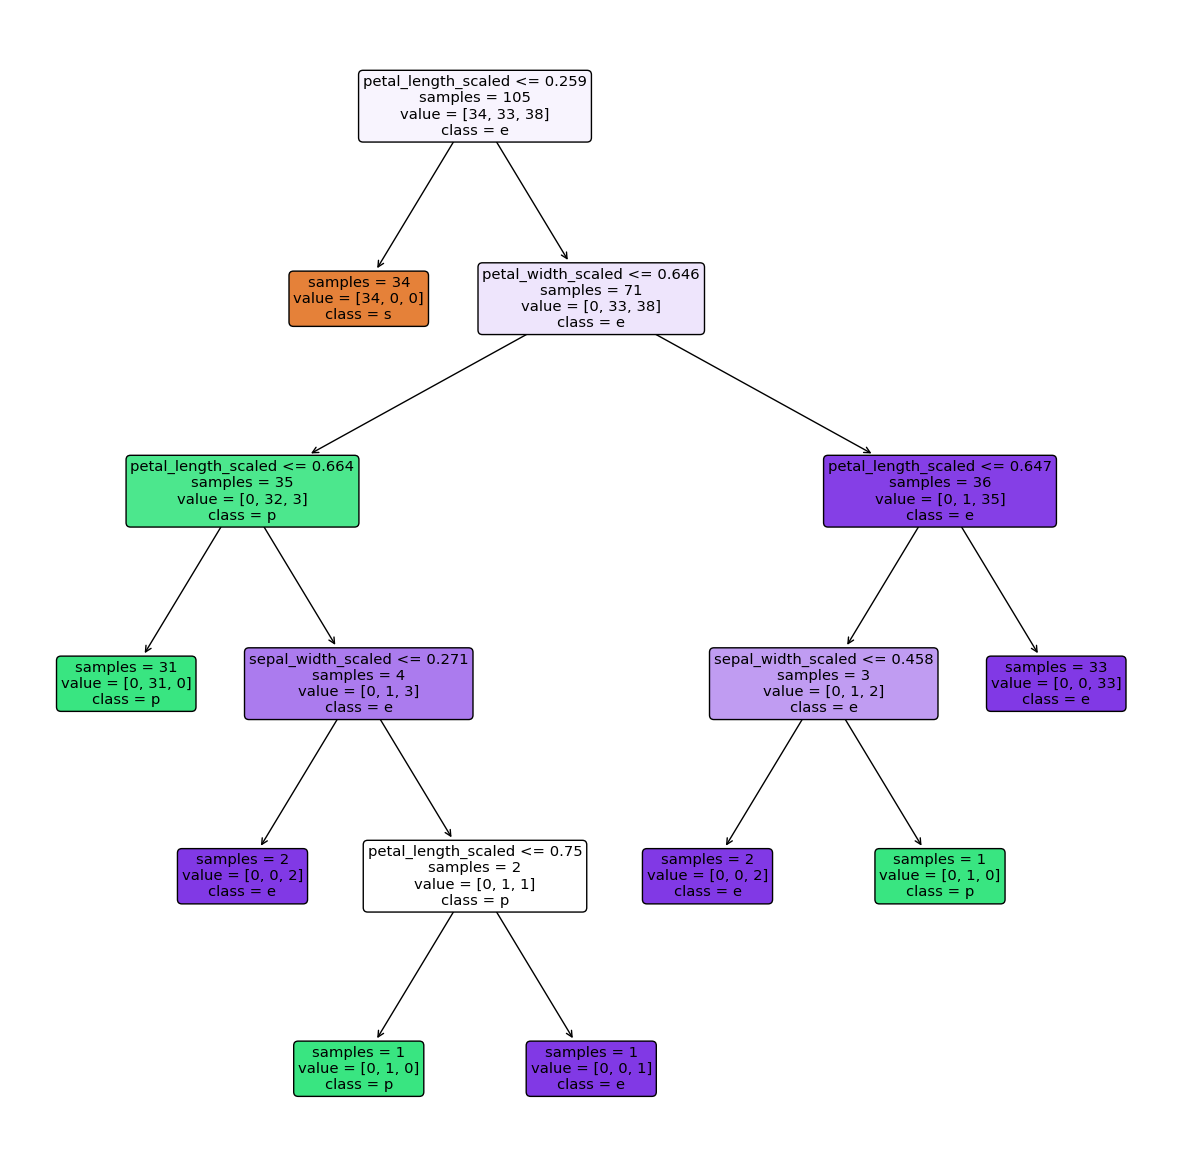

In [47]:
from sklearn import tree
plt.figure(figsize = (15,15))
tree.plot_tree(classifier, 
               feature_names = feature_names,
               class_names = target_name,
               filled = True,
               rounded = True, 
               impurity = False)
plt.show()

In [29]:
print(tree.export_text(dt_classifier, 
                       feature_names=feature_names))

|--- petal_width_scaled <= 0.75
|   |--- class: setosa
|--- petal_width_scaled >  0.75
|   |--- petal_width_scaled <= 1.65
|   |   |--- petal_length_scaled <= 4.95
|   |   |   |--- class: versicolor
|   |   |--- petal_length_scaled >  4.95
|   |   |   |--- sepal_width_scaled <= 2.65
|   |   |   |   |--- class: virginica
|   |   |   |--- sepal_width_scaled >  2.65
|   |   |   |   |--- sepal_length_scaled <= 6.60
|   |   |   |   |   |--- class: versicolor
|   |   |   |   |--- sepal_length_scaled >  6.60
|   |   |   |   |   |--- class: virginica
|   |--- petal_width_scaled >  1.65
|   |   |--- petal_length_scaled <= 4.85
|   |   |   |--- sepal_width_scaled <= 3.10
|   |   |   |   |--- class: virginica
|   |   |   |--- sepal_width_scaled >  3.10
|   |   |   |   |--- class: versicolor
|   |   |--- petal_length_scaled >  4.85
|   |   |   |--- class: virginica



In [48]:
print('Feature Importances Decision Tree', classifier.feature_importances_)

Feature Importances Decision Tree [0.         0.02624046 0.57451644 0.3992431 ]


### Random Forest Classification

In [49]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

classifier.fit(df_train_features, df_train_target)

RandomForestClassifier()

In [50]:
df_test['RF_predicted'] = classifier.predict(df_test_features)
df_test['RF_correct'] = df_test['RF_predicted'] == df_test[target_name]

df_test

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_scaled,sepal_width_scaled,petal_length_scaled,petal_width_scaled,PCA3_0,PCA3_1,PCA3_2,species,3NN_predicted,3NN_correct,NB_predicted,NB_correct,DT_predicted,DT_correct,RF_predicted,RF_correct
91,6.1,3.0,4.6,1.4,0.500000,0.416667,0.603448,0.541667,0.159586,0.000866,-0.023490,versicolor,versicolor,True,versicolor,True,versicolor,True,versicolor,True
63,6.1,2.9,4.7,1.4,0.500000,0.375000,0.620690,0.541667,0.176700,-0.037621,-0.039195,versicolor,versicolor,True,versicolor,True,versicolor,True,versicolor,True
103,6.3,2.9,5.6,1.8,0.555556,0.375000,0.775862,0.708333,0.404426,-0.023519,0.009274,virginica,virginica,True,virginica,True,virginica,True,virginica,True
6,4.6,3.4,1.4,0.3,0.083333,0.583333,0.051724,0.083333,-0.677009,0.003624,0.099716,setosa,setosa,True,setosa,True,setosa,True,setosa,True
59,5.2,2.7,3.9,1.4,0.250000,0.291667,0.482759,0.541667,0.002211,-0.212800,0.121674,versicolor,versicolor,True,versicolor,True,versicolor,True,versicolor,True
29,4.7,3.2,1.6,0.2,0.111111,0.500000,0.086207,0.041667,-0.658668,-0.061207,0.023403,setosa,setosa,True,setosa,True,setosa,True,setosa,True
27,5.2,3.5,1.5,0.2,0.250000,0.625000,0.068966,0.041667,-0.632218,0.113070,-0.031788,setosa,setosa,True,setosa,True,setosa,True,setosa,True
35,5.0,3.2,1.2,0.2,0.194444,0.500000,0.017241,0.041667,-0.667808,-0.019691,-0.031374,setosa,setosa,True,setosa,True,setosa,True,setosa,True
99,5.7,2.8,4.1,1.3,0.388889,0.333333,0.517241,0.500000,0.046472,-0.116794,0.008852,versicolor,versicolor,True,versicolor,True,versicolor,True,versicolor,True
122,7.7,2.8,6.7,2.0,0.944444,0.333333,0.965517,0.791667,0.740874,0.097607,-0.248567,virginica,virginica,True,virginica,True,virginica,True,virginica,True


In [51]:
df_test['RF_correct'].value_counts()

True     44
False     1
Name: RF_correct, dtype: int64

#### Feature Importance

In [52]:
print('Feature Importances Random Forest', classifier.feature_importances_)

Feature Importances Random Forest [0.09196741 0.02309591 0.48525455 0.39968212]


### Support Vector Machine

In [34]:
from sklearn.svm import SVC
classifier = SVC()

classifier.fit(df_train_features, df_train_target)

SVC()

In [35]:
df_test['SVM_predicted'] = classifier.predict(df_test_features)
df_test['SVM_correct'] = df_test['SVM_predicted'] == df_test[target_name]

df_test

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_scaled,sepal_width_scaled,petal_length_scaled,petal_width_scaled,PCA3_0,PCA3_1,...,3NN_predicted,3NN_correct,NB_predicted,NB_correct,DT_predicted,DT_correct,RF_predicted,RF_correct,SVM_predicted,SVM_correct
91,6.1,3.0,4.6,1.4,0.500000,0.416667,0.603448,0.541667,0.159783,0.000233,...,versicolor,True,versicolor,True,versicolor,True,versicolor,True,versicolor,True
63,6.1,2.9,4.7,1.4,0.500000,0.375000,0.620690,0.541667,0.177186,-0.038109,...,versicolor,True,versicolor,True,versicolor,True,versicolor,True,versicolor,True
103,6.3,2.9,5.6,1.8,0.555556,0.375000,0.775862,0.708333,0.404662,-0.022584,...,virginica,True,virginica,True,virginica,True,virginica,True,virginica,True
6,4.6,3.4,1.4,0.3,0.083333,0.583333,0.051724,0.083333,-0.677153,-0.002630,...,setosa,True,setosa,True,setosa,True,setosa,True,setosa,True
59,5.2,2.7,3.9,1.4,0.250000,0.291667,0.482759,0.541667,0.003376,-0.214755,...,versicolor,True,versicolor,True,versicolor,True,versicolor,True,versicolor,True
29,4.7,3.2,1.6,0.2,0.111111,0.500000,0.086207,0.041667,-0.658184,-0.067177,...,setosa,True,setosa,True,setosa,True,setosa,True,setosa,True
27,5.2,3.5,1.5,0.2,0.250000,0.625000,0.068966,0.041667,-0.632672,0.107290,...,setosa,True,setosa,True,setosa,True,setosa,True,setosa,True
35,5.0,3.2,1.2,0.2,0.194444,0.500000,0.017241,0.041667,-0.667384,-0.025800,...,setosa,True,setosa,True,setosa,True,setosa,True,setosa,True
99,5.7,2.8,4.1,1.3,0.388889,0.333333,0.517241,0.500000,0.047345,-0.118260,...,versicolor,True,versicolor,True,versicolor,True,versicolor,True,versicolor,True
122,7.7,2.8,6.7,2.0,0.944444,0.333333,0.965517,0.791667,0.741098,0.101050,...,virginica,True,virginica,True,virginica,True,virginica,True,virginica,True


In [36]:
df_test['SVM_correct'].value_counts()

True     44
False     1
Name: SVM_correct, dtype: int64

### Logistic Regression Classification

In [37]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, max_iter=1000)

classifier.fit(df_train_features, df_train_target)

LogisticRegression(max_iter=1000, random_state=0)

In [38]:
df_test['LR_predicted'] = classifier.predict(df_test_features)
df_test['LR_correct'] = df_test['LR_predicted'] == df_test[target_name]

df_test

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_scaled,sepal_width_scaled,petal_length_scaled,petal_width_scaled,PCA3_0,PCA3_1,...,NB_predicted,NB_correct,DT_predicted,DT_correct,RF_predicted,RF_correct,SVM_predicted,SVM_correct,LR_predicted,LR_correct
91,6.1,3.0,4.6,1.4,0.500000,0.416667,0.603448,0.541667,0.159783,0.000233,...,versicolor,True,versicolor,True,versicolor,True,versicolor,True,versicolor,True
63,6.1,2.9,4.7,1.4,0.500000,0.375000,0.620690,0.541667,0.177186,-0.038109,...,versicolor,True,versicolor,True,versicolor,True,versicolor,True,versicolor,True
103,6.3,2.9,5.6,1.8,0.555556,0.375000,0.775862,0.708333,0.404662,-0.022584,...,virginica,True,virginica,True,virginica,True,virginica,True,virginica,True
6,4.6,3.4,1.4,0.3,0.083333,0.583333,0.051724,0.083333,-0.677153,-0.002630,...,setosa,True,setosa,True,setosa,True,setosa,True,setosa,True
59,5.2,2.7,3.9,1.4,0.250000,0.291667,0.482759,0.541667,0.003376,-0.214755,...,versicolor,True,versicolor,True,versicolor,True,versicolor,True,versicolor,True
29,4.7,3.2,1.6,0.2,0.111111,0.500000,0.086207,0.041667,-0.658184,-0.067177,...,setosa,True,setosa,True,setosa,True,setosa,True,setosa,True
27,5.2,3.5,1.5,0.2,0.250000,0.625000,0.068966,0.041667,-0.632672,0.107290,...,setosa,True,setosa,True,setosa,True,setosa,True,setosa,True
35,5.0,3.2,1.2,0.2,0.194444,0.500000,0.017241,0.041667,-0.667384,-0.025800,...,setosa,True,setosa,True,setosa,True,setosa,True,setosa,True
99,5.7,2.8,4.1,1.3,0.388889,0.333333,0.517241,0.500000,0.047345,-0.118260,...,versicolor,True,versicolor,True,versicolor,True,versicolor,True,versicolor,True
122,7.7,2.8,6.7,2.0,0.944444,0.333333,0.965517,0.791667,0.741098,0.101050,...,virginica,True,virginica,True,virginica,True,virginica,True,virginica,True


In [39]:
df_test['LR_correct'].value_counts()

True     44
False     1
Name: LR_correct, dtype: int64

### Multi-Layer Perceptron / Neural Network

In [64]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(solver='lbfgs',
                               activation='relu',     #'logistic',
                               alpha=1e-5,
                               hidden_layer_sizes=(5, 5), 
                               random_state=1,
                               max_iter=1000)

classifier.fit(df_train_features, df_train_target)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 5), max_iter=1000,
              random_state=1, solver='lbfgs')

In [65]:
df_test['MLP_predicted'] = classifier.predict(df_test_features)
df_test['MLP_correct'] = df_test['MLP_predicted'] == df_test[target_name]

df_test

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_scaled,sepal_width_scaled,petal_length_scaled,petal_width_scaled,PCA3_0,PCA3_1,...,DT_predicted,DT_correct,RF_predicted,RF_correct,SVM_predicted,SVM_correct,LR_predicted,LR_correct,MLP_predicted,MLP_correct
91,6.1,3.0,4.6,1.4,0.500000,0.416667,0.603448,0.541667,0.159783,0.000233,...,versicolor,True,versicolor,True,versicolor,True,versicolor,True,versicolor,True
63,6.1,2.9,4.7,1.4,0.500000,0.375000,0.620690,0.541667,0.177186,-0.038109,...,versicolor,True,versicolor,True,versicolor,True,versicolor,True,versicolor,True
103,6.3,2.9,5.6,1.8,0.555556,0.375000,0.775862,0.708333,0.404662,-0.022584,...,virginica,True,virginica,True,virginica,True,virginica,True,virginica,True
6,4.6,3.4,1.4,0.3,0.083333,0.583333,0.051724,0.083333,-0.677153,-0.002630,...,setosa,True,setosa,True,setosa,True,setosa,True,setosa,True
59,5.2,2.7,3.9,1.4,0.250000,0.291667,0.482759,0.541667,0.003376,-0.214755,...,versicolor,True,versicolor,True,versicolor,True,versicolor,True,versicolor,True
29,4.7,3.2,1.6,0.2,0.111111,0.500000,0.086207,0.041667,-0.658184,-0.067177,...,setosa,True,setosa,True,setosa,True,setosa,True,setosa,True
27,5.2,3.5,1.5,0.2,0.250000,0.625000,0.068966,0.041667,-0.632672,0.107290,...,setosa,True,setosa,True,setosa,True,setosa,True,setosa,True
35,5.0,3.2,1.2,0.2,0.194444,0.500000,0.017241,0.041667,-0.667384,-0.025800,...,setosa,True,setosa,True,setosa,True,setosa,True,setosa,True
99,5.7,2.8,4.1,1.3,0.388889,0.333333,0.517241,0.500000,0.047345,-0.118260,...,versicolor,True,versicolor,True,versicolor,True,versicolor,True,versicolor,True
122,7.7,2.8,6.7,2.0,0.944444,0.333333,0.965517,0.791667,0.741098,0.101050,...,virginica,True,virginica,True,virginica,True,virginica,True,virginica,True


In [66]:
df_test['MLP_correct'].value_counts()

True     43
False     2
Name: MLP_correct, dtype: int64


## Display

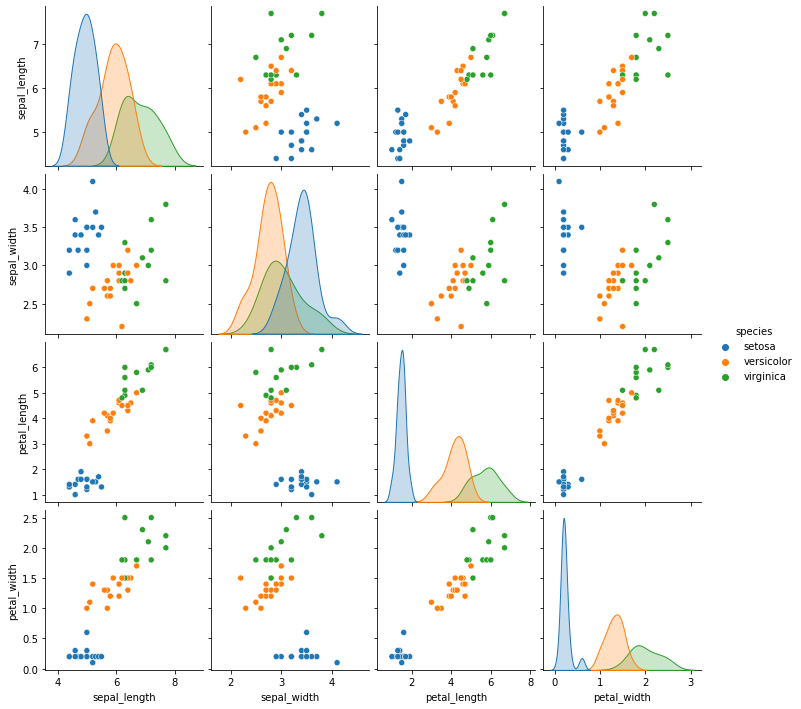

In [62]:
markers = df_test['DT_correct'].map({True: 'o', False: 'x'})
hue = df_test['species'].map({'setosa': 'blue', 'virginica': 'orange', 'versicolor': 'green'})

sns.pairplot(data = df_test,
             vars = ['sepal_length','sepal_width','petal_length','petal_width'],
             hue = 'species');

In [70]:
levels = {0:'setosa', 1:'versicolor', 2:'virginica'}

def plot_iris(df, col1, col2, target_column, predicted_column, ax=None):
    markers = {True:('o', 16, 0.8), False:('x', 80, 0.)}
    
    targets = sorted(df[target_column].unique())
    cycle_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    colors = dict(zip(targets, cycle_colors[:len(target_column)]))
    
    if ax is None:
        ax = plt.figure(figsize=(6, 6)).gca() # define plot axis
        
    for is_correct, m in markers.items():
        for specie, c in colors.items():
            if is_correct:
                df_temp = df[(df[target_column] == df[predicted_column]) & (df[target_column] == specie)]
            else:
                df_temp = df[(df[target_column] != df[predicted_column]) & (df[target_column] == specie)]

            sns.regplot(x = col1, 
                        y = col2, 
                        data = df_temp,  
                        fit_reg = False, 
                        scatter_kws = {'color': c, 's': m[1], 'alpha': m[2]},
                        marker = m[0],
                        ax = ax)
            
    plt.xlabel(col1)
    plt.ylabel(col2)

In [71]:
feature_names

['sepal_length_scaled',
 'sepal_width_scaled',
 'petal_length_scaled',
 'petal_width_scaled']

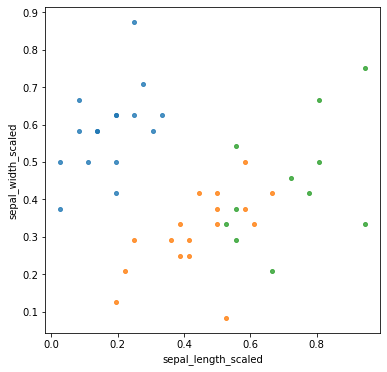

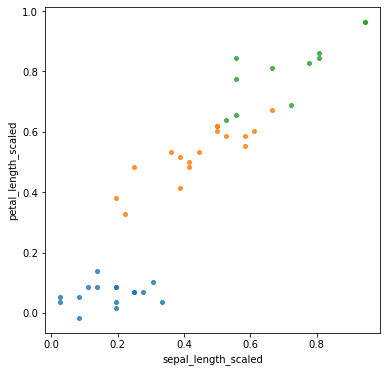

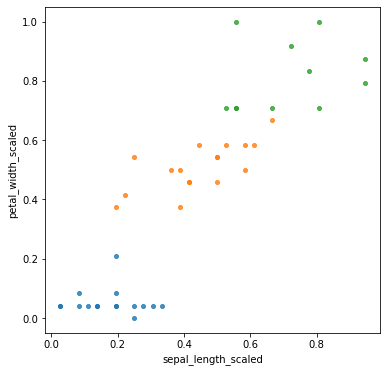

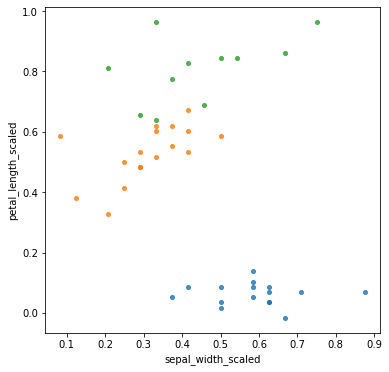

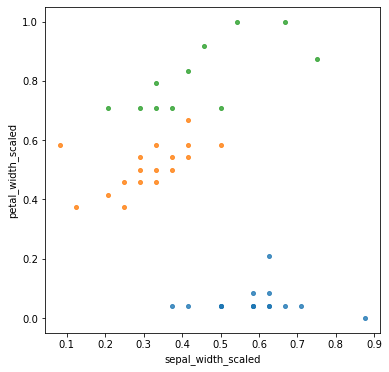

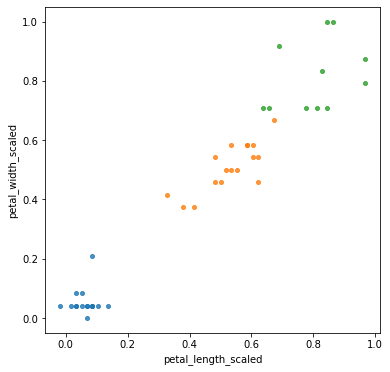

In [74]:
from itertools import combinations
for x, y in combinations(feature_names, 2):
    plot_iris(df_test, x, y, 'species', '3NN_predicted')

In [75]:
def plot_iris_all(df, feature_columns, target_column, predicted_column):
    targets = sorted(df[target_column].unique())
    markers = {True:('o', 16, 0.8), False:('x', 80, 0.9)}
    cycle_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    colors = dict(zip(targets, cycle_colors[:len(targets)]))
    n = len(feature_columns)
    fig, axs = plt.subplots(n, n, sharex='col', sharey='row', figsize=(16, 16))
    for irow, row_feature in enumerate(feature_columns):
        for icol, col_feature in enumerate(feature_columns):
            if irow == icol:
                axs[irow, icol].set_visible(False) 
                axs[irow, icol].axis('off')
            else:
                for is_correct, m in markers.items():
                    for specie, c in colors.items():
                        if is_correct:
                            df_temp = df[(df[target_column] == df[predicted_column]) & (df[target_column] == specie)]
                        else:
                            df_temp = df[(df[target_column] != df[predicted_column]) & (df[target_column] == specie)]

                        sns.regplot(x = col_feature, 
                                    y = row_feature, 
                                    data = df_temp,  
                                    fit_reg = False, 
                                    marker = m[0],
                                    scatter_kws = {'color': c, 's': m[1], 'alpha':m[2]},
                                    ax = axs[irow, icol])

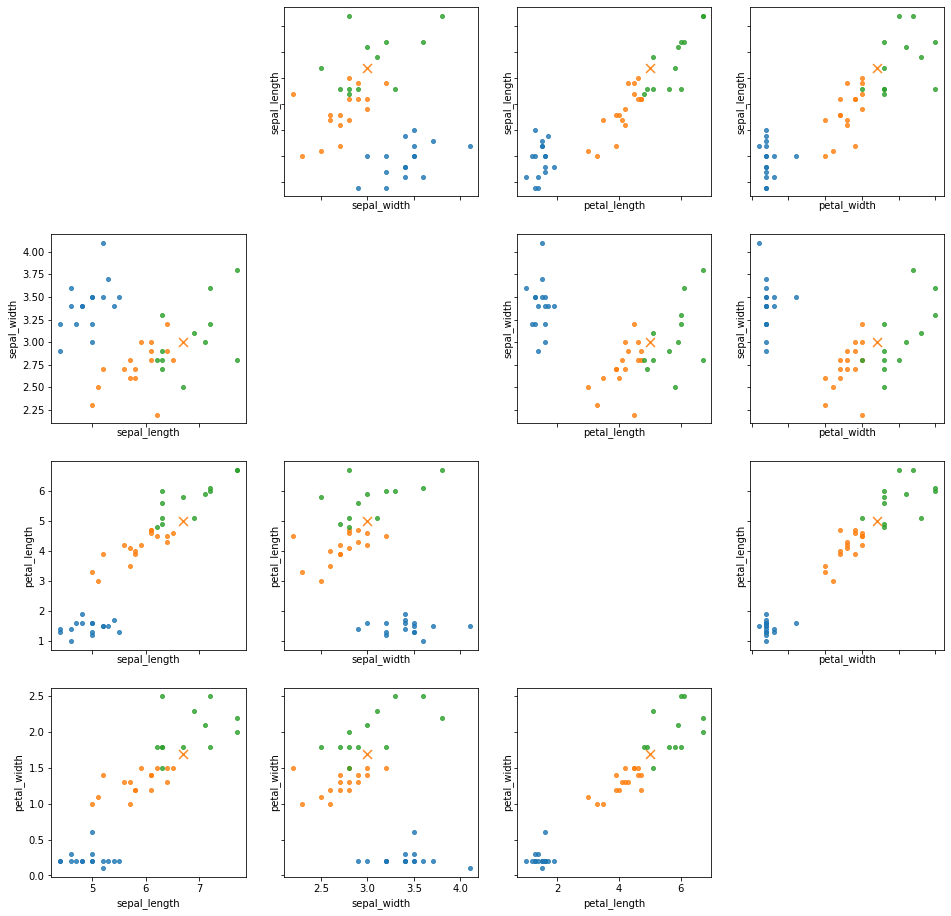

In [36]:
plot_iris_all(df_test, feature_names, target_name, 'DT_predicted')

## Preformance metrics

In [45]:
prediction = 'DT_predicted'

In [46]:
import sklearn.metrics as sklm

### confusion matrix

In [47]:
cm = sklm.confusion_matrix(df_test[target_name], df_test[prediction])

cm

array([[16,  0,  0],
       [ 0, 16,  1],
       [ 0,  0, 12]])

### accuracy

In [40]:
accuracy = sklm.accuracy_score(df_test[target_name], df_test[prediction])

accuracy

0.9777777777777777

### precision, recall and f-score

In [48]:
metrics = sklm.precision_recall_fscore_support(df_test[target_name], df_test[prediction])

metrics

(array([1.        , 1.        , 0.92307692]),
 array([1.        , 0.94117647, 1.        ]),
 array([1.        , 0.96969697, 0.96      ]),
 array([16, 17, 12]))

### all together now

In [49]:
def print_metrics(labels, scores):
    conf = sklm.confusion_matrix(labels, scores)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    print('Confusion matrix')
    print()
    print('                 Predicted Setosa    Predicted Versicolor     Predicted Virginica')
    print('Actual Setosa       %6d' % conf[0,0] + '               %5d' % conf[0,1] + '                    %5d' % conf[0,2])
    print('Actual Versicolor   %6d' % conf[1,0] + '               %5d' % conf[1,1] + '                    %5d' % conf[1,2])
    print('Actual Virginica    %6d' % conf[2,0] + '               %5d' % conf[2,1] + '                    %5d' % conf[2,2])
    print()
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print()
    print('               Setosa        Versicolor         Virginica')
    print('Num case   %10d' % metrics[3][0] + '        %10d' % metrics[3][1]+ '        %10d' % metrics[3][2])
    print('Precision  %10.2f' % metrics[0][0] + '        %10.2f' % metrics[0][1] + '        %10.2f' % metrics[0][2])
    print('Recall     %10.2f' % metrics[1][0] + '        %10.2f' % metrics[1][1] + '        %10.2f' % metrics[1][2])
    print('F1         %10.2f' % metrics[2][0] + '        %10.2f' % metrics[2][1] + '        %10.2f' % metrics[2][2])

In [44]:
print('\n3-Nearest Neighbor **************************************************************\n')
print_metrics(df_test[target_name], df_test['3NN_predicted'])   

print('\nNaive Bayes *********************************************************************\n')
print_metrics(df_test[target_name], df_test['NB_predicted'])   

print('\nDecision Tree *******************************************************************\n')
print_metrics(df_test[target_name], df_test['DT_predicted'])   

print('\nRandom Forest *******************************************************************\n')
print_metrics(df_test[target_name], df_test['RF_predicted'])   

print('\nLogistic Regression **************************************************************\n')
print_metrics(df_test[target_name], df_test['LR_predicted'])   

print('\nMulti-Layer Perceptron / Neural Network ******************************************\n')
print_metrics(df_test[target_name], df_test['MLP_predicted'])   


3-Nearest Neighbor **************************************************************

Confusion matrix

                 Predicted Setosa    Predicted Versicolor     Predicted Virginica
Actual Setosa           16                   0                        0
Actual Versicolor        0                  17                        0
Actual Virginica         0                   1                       11

Accuracy  0.98

               Setosa        Versicolor         Virginica
Num case           16                17                12
Precision        1.00              0.94              1.00
Recall           1.00              1.00              0.92
F1               1.00              0.97              0.96

Naive Bayes *********************************************************************

Confusion matrix

                 Predicted Setosa    Predicted Versicolor     Predicted Virginica
Actual Setosa           16                   0                        0
Actual Versicolor        0           